<a href="https://colab.research.google.com/github/HAFSAnCR7/Assignment-3-AI-/blob/main/Assignment%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
For this assignment, I found a dataset on multidimensional poverty measures. Essentially, this dataset is centered around the idea that multidimensional poverty measures who is poor and how they are poor (different disadvantages they experience such as lack of clean water and lack of schooling education). I decided to use this dataset because I am interested in seeing how much poverty exists in the world. 

I will use Linear Regression to show that the average distance below the poverty line of those listed as poor in urban areas is increasing(getting higher) and because this is increasing, then so will the average listed as poor in rural areas(what I am trying to predict) (also increasing, getting higher).

For my classification part, I found a dataset on the Austin Animal Shelter. I decided to use the cat classificaton dataset because I am a big animal lover and I love kittens/cats. I will use Neural Network to classify the outcomes of the animals based on their attributes to predict outcome_type. Essentially I am going to use outcome_age_(days), breed, outcome_subtype, and sex_upon_outcome to predict the ultimate outcome for the cat/kitten (transferred, adoption, euthanized) 



# Section 1: Regression Dataset Prep
- At a high level, discuss what columns are included in the data:

    For my regression dataset, there are 8 columns which are the following: ISO which is the unique ID for country, Country which is the country name (different countries listed), MPI Urban which is the multi-dimensional poverty index for urban areas within the country, Headcount Ratio Urban which is the poverty headcount ratio (% of population listed as poor) within urban ares within the country, Intensity of Deprivation Urban which is the average distance below the poverty line of those listed as poor in urban areas, MPI Rural which is the multi-dimensional poverty index for rural areas within the country, Headcount Ratio Rural which is the poverty headcount ratio (% of population listed as poor) within rural areas within the country, Intensity of Deprivation Rural which is the average distance below the poverty line of those listed as poor in rural areas
      
    
  

- All the following from the rubric will now be done below:
    - Load the dataset now using pandas
    - Load the dataset you've selected using pandas
    - Show the head of the data
    - For the columns you will be using in your regression, describe their setup in more detail
    - Clean the data if needed using pandas
        

In [ ]:
import pandas as pd
import numpy as np
MPI_national = pd.read_csv("MPI_national.csv")
# https://www.kaggle.com/ophi/mpi
MPI_national
# Essentialy, here, I am using pandas to load the output of the all the columns from my Multidimensional Poverty dataset 

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9
...,...,...,...,...,...,...,...,...
97,CAF,Central African Republic,0.289,58.2,49.7,0.519,89.79,57.8
98,LBR,Liberia,0.290,60.5,48.0,0.481,84.86,56.6
99,SOM,Somalia,0.293,55.9,52.4,0.651,96.92,67.2
100,TCD,Chad,0.351,64.8,54.1,0.609,93.41,65.2


In [ ]:
# Here, I am using the first 50 rows of my Multidimensional Poverty dataset
# head of the data 
MPI_national.head(50)

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9
5,MKD,"Macedonia, The former Yugoslav Republic of",0.001,0.3,36.3,0.004,1.17,35.5
6,TKM,Turkmenistan,0.001,0.4,33.9,0.001,0.32,34.3
7,MDA,"Moldova, Republic of",0.001,0.3,42.2,0.003,1.01,34.7
8,GUY,Guyana,0.001,0.4,38.2,0.017,4.25,40.4
9,MNE,Montenegro,0.002,0.4,47.2,0.000,0.09,41.1


Essentially, what I want to predict is that the average distace below the poverty line of those listed as poor in rural areas is also getting higher(increasing), as the average distance below the poverty line of those listed in urban areas increases.
I will be using the columns: 
    
    1. Average distance below the poverty line of those listed a poor in rural areas (predict)
    
    2. Average distance below the poverty line of those listed as poor in urban areas (feature)
    
Essentially, Average distance below the poverty line of those listed as poor in rural areas is getting higher (what we are trying to predict), as the average distance below the poverty line of those listed as poor in poor in urban areas increases.

- Clean the data if needed using pandas
  
For my dataset, I did not need to clean it since the two columns that I am using have no invalid data values 

# Section 2: Regression
 -For my dataset, I am going to predict that average distance below the poverty line of those listed as poor in rural will also increase as when average distance below the poverty line of those listed as poor in poor in urban areas increases.
    
By looking at my dataset, I predict that that avg. distance below poverty line for people living in rural areas is increasing as well bc in rural areas, it is also very difficult to get out of the poverty system. Factors such as: lack of education, clean water, and lack of food makes it difficult for people living in rural areas to move up in society and climb out of the poverty hole.


The dataset has 102 rows which is a sufficent amount of data. Now, to spilt the data so that the data we obtain is far more accurate and better cleaned up for the graph, I will be using 80% (basically 82 rows) for training and 20% (20 rows) for testing.
        


In [ ]:
# Use sklearn to split our dataset 
from sklearn.model_selection import train_test_split
from sklearn import svm

# Getting the intensity of deprivation urban column as a subset of the data to use for features
x = MPI_national[["Intensity of Deprivation Urban"]]

# Getting the intensity of deprivation rural as a subset of the data to use for prediction
y = MPI_national["Intensity of Deprivation Rural"]

# Using sklearn to split the data between a training set and testing set
# 82 rows for training and 20 rows for testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 20, train_size = 82, shuffle = True)
# We have x_train, y_train and have x_test, y_test


Here, essentially now will be having the linear regression fit (done using the training set)

In [ ]:
# import (like shown in the examples from the links)
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)

Now, let us finally see the actual material:

Coefficients we get are: 
 [1.5467113]
The mean squared error is the following: 4.702958355493251
Coeff. of Determination: 0.9261382825861056
Now, we have the score which is from retrieved from cross-validation: 0.9261382825861056


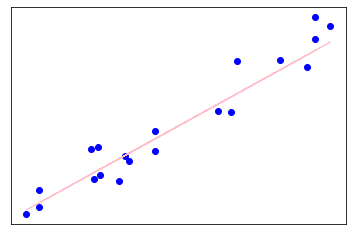

In [ ]:
# All these are needed for it to help us see the graph
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

prediction = reg.predict(x_test)

print("Coefficients we get are: \n", reg.coef_)

# Now, have the following: Mean squared error
print("The mean squared error is the following:", mean_squared_error(y_test, prediction))

# A value of 1.0 indicates a perfect fit, and is thus a highly reliable mode
print("Coeff. of Determination:", r2_score(y_test, prediction))

# Now we have the socre outcome printed:
print("Now, we have the score which is from retrieved from cross-validation:", reg.score(x_test,y_test))

# I used the colors: blue and pink 
plt.scatter(x_test, y_test,  color = 'blue')
plt.plot(x_test, prediction, color = 'pink', linewidth = 1)


plt.xticks(())
plt.yticks(())

plt.show()

- The last part for this asks for an explanation of what we are seeing from this graph:
    
    By looking at my regression that I have just gotten, I can see that what I am assuming is true. The Average distance below the poverty line of those listed a poor in urban areas is high(increasing), therefore the Average distance below the poverty line of those listed a poor in rural areas is also increasing.
    
    Looking at the acquired mean sqaured error of the test set, can see it is 19.421561906733842. For score, we see that is gives us 0.7164863793502215.
    With this information, I can come to the conclusion that what I had predicted is not entirely correct. The reason being that stuff such as: lack of school education, lack of clean water in certain areas, and poor health can be factors affecting the results of the data to not be what I predicted.
        
    With this being said and all, the graph still seems to prove what I had assumed, as correct.

# Section 3: Classification Dataset Prep
For my Austin Animal Center Shelter Outcomes classification dataset (dealing with cat dataset), there are 37 columns which are the following: 
        
        1. age_upon_outcome which is the age of the animal at the time at which it left the shelter
        2. animal_id which is the unique values
        3. animal_type which is the: cat, dog, or other (including at least one bat!)
        4. breed which is the animal breed (many animals are generic mixed-breeds, e.g. "Long-haired mix")
        5. color which is the color of the animal's fur, if it has fur
        6. date_of_birth 
        7. datetime which is the timestamp of outcome
        8. monthyear
        9. name
        10. outcome_subtype
        11. outcome_type which is the ultimate outcome for this animal. Possible entries include transferred, [mercy] euthanized, adopted
        12. sex_upon_outcome
        13. count
        14. sex
        15. spay/Neuter
        16. Periods
        17. Period Range
        18. outcome_age_(days)
        19. outcome_age_(years)
        20. Cat/Kitten (outcome)
        21. sex_age_outcome
        22. age_group
        23. dob_year
        24. dob_month
        25. dob_monthyear
        26. outcome_month
        27. outcome_year
        28. outcome_weekday
        29. outcome_hour
        30. breed1
        31. breed2
        32. cfa_breed
        33. domestic_breed
        34. coat_pattern
        35. color1
        36. color2
        37. coat
        

In [ ]:
# Load the dataset using pandas (like mentioned in rubric)
import pandas as pd
aac_shelter_cat_outcome_eng = pd.read_csv("aac_shelter_cat_outcome_eng.csv") 
# https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and?select=aac_shelter_cat_outcome_eng.csv
aac_shelter_cat_outcome_eng
# Essentialy, here, I am using pandas to load the output of the all the columns from my Austin Animal Center Shelter Outcomes dataset 

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29416,2 months,A758112,Cat,american shorthair,blue /white,2017-09-14 00:00:00,2017-12-10 17:44:00,2017-12-10T17:44:00,Allee Chat,NaN,...,Sunday,17,american shorthair,NaN,True,False,tabby,blue,white,blue
29417,1 month,A758569,Cat,domestic shorthair,brown /white,2017-08-03 00:00:00,2017-09-24 11:57:00,2017-09-24T11:57:00,Mia,NaN,...,Sunday,11,domestic shorthair,NaN,False,True,tabby,brown,white,brown
29418,1 year,A765938,Cat,domestic shorthair,brown,2017-01-30 00:00:00,2018-02-01 17:51:00,2018-02-01T17:51:00,NaN,Partner,...,Thursday,17,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
29419,6 months,A765832,Cat,domestic shorthair,NaN,2017-07-28 00:00:00,2018-02-01 16:37:00,2018-02-01T16:37:00,Luna,NaN,...,Thursday,16,domestic shorthair,NaN,False,True,tortie,Breed Specific,NaN,tortie


In [ ]:
# head
aac_shelter_cat_outcome_eng.head(50)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black
5,2 months,A684460,Cat,domestic shorthair,brown,2014-06-02 00:00:00,2014-08-13 15:04:00,2014-08-13T15:04:00,Elsa,NaN,...,Wednesday,15,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
6,8 months,A673952,Cat,domestic shorthair,brown /white,2013-07-05 00:00:00,2014-03-06 14:29:00,2014-03-06T14:29:00,NaN,SCRP,...,Thursday,14,domestic shorthair,NaN,False,True,tabby,brown,white,brown
7,5 months,A686497,Cat,domestic shorthair,black,2014-03-22 00:00:00,2014-08-31 15:45:00,2014-08-31T15:45:00,Chester,NaN,...,Sunday,15,domestic shorthair,NaN,False,True,tabby,black,NaN,black
8,2 months,A687965,Cat,domestic shorthair,orange,2014-08-03 00:00:00,2014-10-31 18:29:00,2014-10-31T18:29:00,*Oliver,Foster,...,Friday,18,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
9,1 year,A668547,Cat,domestic mediumhair,black/white,2012-12-04 00:00:00,2013-12-16 13:59:00,2013-12-16T13:59:00,*Preston,Partner,...,Monday,13,domestic mediumhair,NaN,False,True,NaN,black,white,black


For the columns you will be using in your classification, describe the range of values

For mine, I have the following:
    
    1. outcome_age_(days) has a range of: 0-8030
    2. breed has a range of: domestic shorthair, domestic mediumhair, other
    3. outcome_subtype has a range of: null, partner, other
    4. sex_upon_outcome has a range of: Spayed Female, Neutered Male, other
    5. outcome_type has a range of: transfer, adoption, other

    
    

# Section 4: Classification

For my classification dataset, I have 29421 rows which is handful of data. 

I will be splitting my data by using 96% (28244 rows) for training and 4% (1177 rows) for testing

In [ ]:
from sklearn.neural_network import MLPClassifier


# For features (using 4)
x_val = aac_shelter_cat_outcome_eng[["outcome_age_(days)", "breed", "outcome_subtype", "sex_upon_outcome"]]

# For prediction (using 1)
y_val = aac_shelter_cat_outcome_eng["outcome_type"]

# Going to use sklearn to split the data. This is done to essentially split the data btwn a testing test and training set
x_train_val, x_test_val, y_train_val, y_test_val = train_test_split(x_val, y_val, test_size = 1177, train_size = 28244, shuffle=True)


## Conclusions (Section 5)

For my multidimensional poverty measure dataset, I essentially used linear regression. Using linear regression to predict the avg. distance below poverty line for people living in rural areas is also increasing as avg. distance below poverty line for people living in urban areas increases. From the calculations and graph, I found out there is a truth to this. As mentioned before, other factors such as: lack of school education, lack of clean water in certain areas, and poor health can also affect the datadset. What I found interesting was the increasing growth. in poverty in areas such as: urban and rural. To extend this project further, I would use other columns to test/predict other theories.   

For my Austin Animal Center Shelter Outcomes, I essentially was trying to use Neural Networks to classify the outcomes of the animals based on their attributes to predict outcome_type.
To extend the project further, well, my first step would be actually completely finishing it, after that, probably using more columns for my features. Maybe try using the cvs file for other animals at the shelter (such as dogs).